In [15]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt

In [54]:
logfile = '../unet/test_log.tsv'
SUPER_TITLE = 'UNet'
logs = pd.read_table(logfile, header=0, index_col=None)

# Get training step and magnification as columns
def add_cols(logs):
    steppatt = r'.-(?P<step>\d+)'
    magpatt = r'^(?P<mag>\d{1,2}x)/.+'
    steps = []
    mags = []
    for x in logs['SNAPSHOT']:
        step = re.findall(pattern=steppatt, string=x)[0]
        mag = re.findall(pattern=magpatt, string=x)[0]
        steps.append(int(step))
        mags.append(mag)

    tdf = pd.DataFrame({'STEP': steps, 'MAG': mags}, index=logs.index)
    logs = logs.join(tdf, how='inner')
    return logs

logs = add_cols(logs)


Text(0,0.5,'UNet')

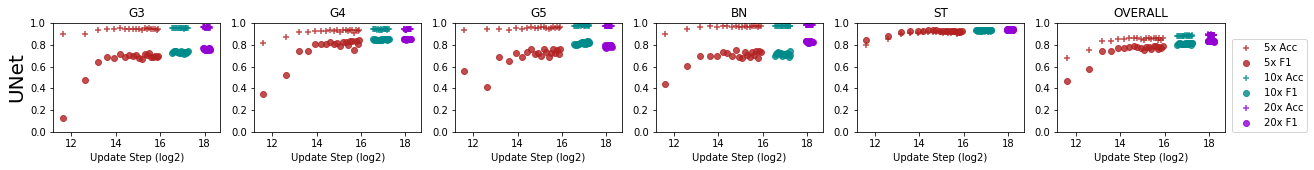

In [55]:
fig, axs = plt.subplots(1, 6, figsize=(21, 2))
f1_cols = ['G3_F1', 'G4_F1', 'G5_F1', 'BN_F1', 'ST_F1', 'OVERALL_F1']
a_cols = ['G3_A', 'G4_A', 'G5_A', 'BN_A', 'ST_A', 'OVERALL_A']
colors = ['firebrick', 'darkcyan', 'darkviolet']

for mag, color in zip(['5x', '10x', '20x'], colors):
    df = logs.iloc[[mag in x for x in logs['SNAPSHOT']], :]
    for ax, a_col, f1_col in zip(axs, a_cols, f1_cols):
        sns.regplot(np.log2(df['STEP']), df[a_col], fit_reg=False, label=mag+' Acc', ax=ax, color=color, marker='+')
        sns.regplot(np.log2(df['STEP']), df[f1_col], fit_reg=False, label=mag+' F1', ax=ax, color=color)
    
for ax, col in zip(axs, a_cols):
    ax.set_title(col.replace('_A', ''))
    ax.set_ylabel('')
    ax.set_ylim([0,1.])
    ax.set_xlabel('Update Step (log2)')
    
plt.legend(bbox_to_anchor=(1.01, 0.9))
axs[0].set_ylabel('{}'.format(SUPER_TITLE), fontsize=20)
# plt.savefig('/home/nathan/Dropbox/_papers/gleason_grade/pixel_performance_{}.pdf'.format(SUPER_TITLE))

In [56]:
## Max overall Accuracy and F1
logs.sort_values(by='OVERALL_A', ascending=False)

,SNAPSHOT,G3_A,G4_A,G5_A,BN_A,ST_A,G3_F1,G4_F1,G5_F1,BN_F1,ST_F1,OVERALL_A,OVERALL_F1,MAG,STEP
50,20x/snapshots/unet.ckpt-282100,0.959365,0.943214,0.977548,0.982159,0.929087,0.761326,0.855508,0.800805,0.838484,0.941566,0.895686,0.839538,20x,282100
40,20x/snapshots/unet.ckpt-251100,0.961299,0.941410,0.977269,0.981859,0.929345,0.769723,0.852810,0.795079,0.833126,0.941812,0.895591,0.838510,20x,251100
55,20x/snapshots/unet.ckpt-297600,0.960803,0.942049,0.977680,0.981136,0.927845,0.766582,0.854010,0.798045,0.826290,0.940663,0.894757,0.837118,20x,297600
51,20x/snapshots/unet.ckpt-285200,0.960712,0.942261,0.977012,0.981376,0.927499,0.765816,0.854492,0.792862,0.828821,0.940360,0.894430,0.836470,20x,285200
58,20x/snapshots/unet.ckpt-306900,0.960256,0.941934,0.977028,0.980963,0.928373,0.762909,0.854546,0.792585,0.823827,0.941016,0.894277,0.834977,20x,306900
45,20x/snapshots/unet.ckpt-266600,0.960699,0.940749,0.976503,0.981568,0.928897,0.765870,0.851716,0.786432,0.831494,0.941390,0.894208,0.835380,20x,266600
57,20x/snapshots/unet.ckpt-303800,0.959157,0.941423,0.977547,0.980843,0.929326,0.763064,0.852604,0.799235,0.821841,0.941632,0.894147,0.835675,20x,303800
41,20x/snapshots/unet.ckpt-254200,0.960363,0.942259,0.976049,0.981704,0.927796,0.766830,0.853771,0.782276,0.831778,0.940640,0.894085,0.835059,20x,254200
53,20x/snapshots/unet.ckpt-291400,0.959750,0.940961,0.977011,0.981865,0.928520,0.761987,0.851442,0.790950,0.833408,0.941152,0.894054,0.835788,20x,291400
54,20x/snapshots/unet.ckpt-294500,0.958614,0.941448,0.977049,0.980832,0.930143,0.756941,0.852192,0.797859,0.822765,0.942357,0.894042,0.834423,20x,294500


In [57]:
## Max overall Accuracy and F1
logs.sort_values(by='OVERALL_F1', ascending=False)

,SNAPSHOT,G3_A,G4_A,G5_A,BN_A,ST_A,G3_F1,G4_F1,G5_F1,BN_F1,ST_F1,OVERALL_A,OVERALL_F1,MAG,STEP
50,20x/snapshots/unet.ckpt-282100,0.959365,0.943214,0.977548,0.982159,0.929087,0.761326,0.855508,0.800805,0.838484,0.941566,0.895686,0.839538,20x,282100
40,20x/snapshots/unet.ckpt-251100,0.961299,0.941410,0.977269,0.981859,0.929345,0.769723,0.852810,0.795079,0.833126,0.941812,0.895591,0.838510,20x,251100
55,20x/snapshots/unet.ckpt-297600,0.960803,0.942049,0.977680,0.981136,0.927845,0.766582,0.854010,0.798045,0.826290,0.940663,0.894757,0.837118,20x,297600
51,20x/snapshots/unet.ckpt-285200,0.960712,0.942261,0.977012,0.981376,0.927499,0.765816,0.854492,0.792862,0.828821,0.940360,0.894430,0.836470,20x,285200
53,20x/snapshots/unet.ckpt-291400,0.959750,0.940961,0.977011,0.981865,0.928520,0.761987,0.851442,0.790950,0.833408,0.941152,0.894054,0.835788,20x,291400
57,20x/snapshots/unet.ckpt-303800,0.959157,0.941423,0.977547,0.980843,0.929326,0.763064,0.852604,0.799235,0.821841,0.941632,0.894147,0.835675,20x,303800
56,20x/snapshots/unet.ckpt-300700,0.961229,0.941767,0.976532,0.981298,0.927225,0.768155,0.853830,0.787293,0.827745,0.940127,0.894026,0.835430,20x,300700
45,20x/snapshots/unet.ckpt-266600,0.960699,0.940749,0.976503,0.981568,0.928897,0.765870,0.851716,0.786432,0.831494,0.941390,0.894208,0.835380,20x,266600
41,20x/snapshots/unet.ckpt-254200,0.960363,0.942259,0.976049,0.981704,0.927796,0.766830,0.853771,0.782276,0.831778,0.940640,0.894085,0.835059,20x,254200
58,20x/snapshots/unet.ckpt-306900,0.960256,0.941934,0.977028,0.980963,0.928373,0.762909,0.854546,0.792585,0.823827,0.941016,0.894277,0.834977,20x,306900


## Model comparison

In [42]:
# unet_log = '../unet/unet_log.tsv'
# unet_log = pd.read_table(unet_log, header=0, index_col=None)
# unet_log = add_cols(unet_log)

tiramisu_log = '../densenet/test_log.tsv'
tiramisu_log = pd.read_table(tiramisu_log, header=0, index_col=None)
tiramisu_log = add_cols(tiramisu_log)

fcn_log = '../fcn8s/test_log.tsv'
fcn_log = pd.read_table(fcn_log, header=0, index_col=None)
fcn_log = add_cols(fcn_log)